In [ ]:
from pathlib import Path # We'll also make use of the `pathlib` module to assist with managing file-paths, although this is entirely optional! 
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import seaborn as sns
import tfv.xarray
import xarray as xr  # We utilise xarray to do all the heavy lifting 

# A nice plot default
sns.set(style='white', font_scale=0.8)

In [7]:
model_folder = Path(r'E:/WAMSI/')
model_file = 'csiem_B009_20221101_20240401_WQ.nc'

fv = xr.open_dataset(model_folder / model_file, decode_times=False).tfv
# fv  # Uncomment if you'd like to review the dataset

In [3]:
polyline = np.loadtxt('polyline.csv', skiprows=1, delimiter=',')
polyline

array([[115.672, -32.157],
       [115.677, -32.155],
       [115.683, -32.154],
       [115.689, -32.152],
       [115.694, -32.151],
       [115.699, -32.149],
       [115.703, -32.147],
       [115.708, -32.145],
       [115.713, -32.144],
       [115.719, -32.142],
       [115.724, -32.141],
       [115.731, -32.139],
       [115.736, -32.138],
       [115.74 , -32.137]])

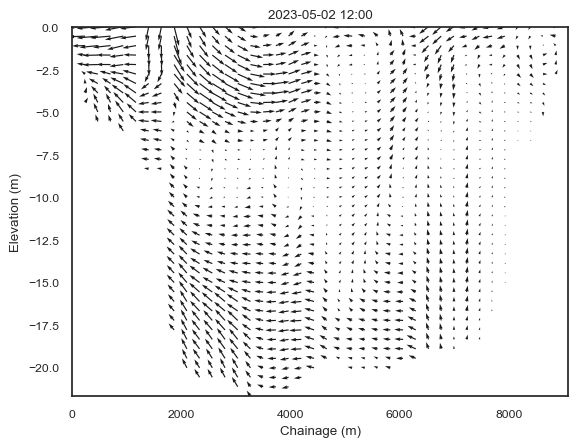

In [4]:
time = '2023-05-02 12:00'
curtain = fv.plot_curtain_vector(
    polyline,
    time=time,   # <-- only vertical velocity
    tangential=False,  # prevents auto-scaling with W
)


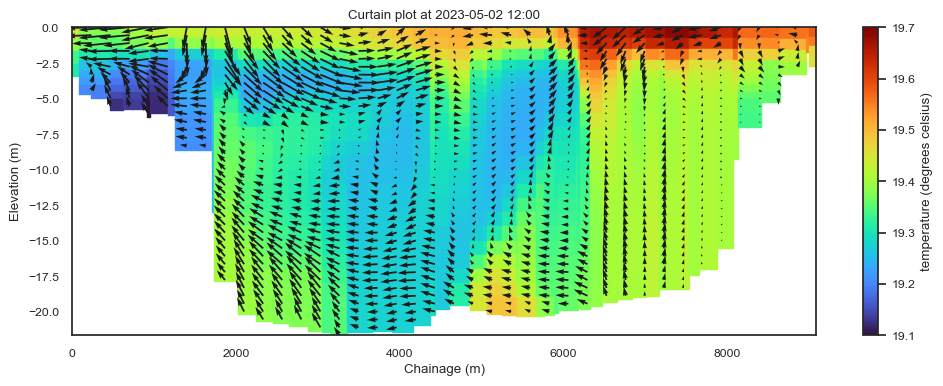

In [15]:
time = "2023-05-02 12:00"
polyline = np.loadtxt("polyline.csv", skiprows=1, delimiter=",")

# Make figure + axis
fig, ax = plt.subplots(figsize=(12, 4))

# First: plot the scalar variable (TEMP curtain)
fv.plot_curtain(
    polyline,
    "TEMP",
    time=time,
    ax=ax, ec="face",  # edgecolor
    cmap="turbo",
    clim=(19.1, 19.7),   # optional limits
)

# Second: overlay velocity vectors
fv.plot_curtain_vector(
    polyline,
    time=time,
    tangential=False,   # ensures W is shown without projection scaling
    ax=ax,
    # scale=5,            # adjust arrow scaling
    # color="k",          # vector color (black arrows)
    # width=0.002,        # arrow thickness
)

plt.title(f"Curtain plot at {time}")
plt.show()


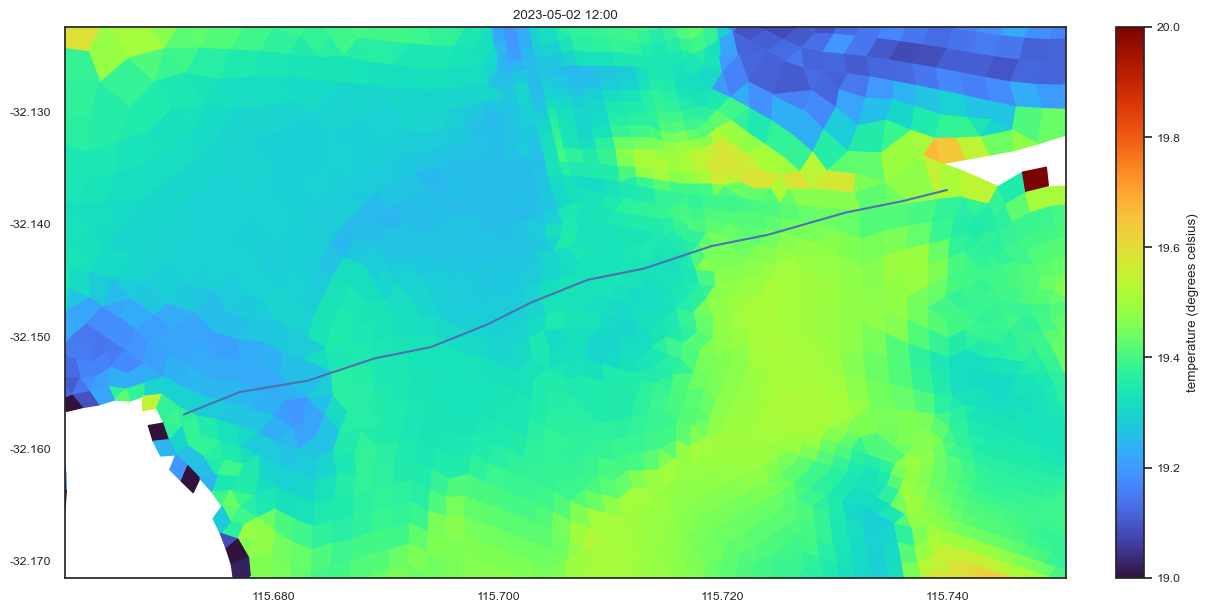

In [14]:

fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True)
cspec = dict(cmap='turbo', clim=(19, 20))

# Plot polyline and TEMP on the same axes
ax.set_aspect('equal', adjustable='datalim')
ax.plot(polyline[:, 0], polyline[:, 1])
fv.plot('TEMP', time, ax=ax, colorbar=True, **cspec)  # Spatial map

plt.show()

In [3]:
import geopandas as gpd
import pandas as pd

# Load the shapefile
shp_path = r"E:/WAMSI/csiem-marvl/gis/Curtain/New_Curtain_line_LL_100m.shp"
gdf = gpd.read_file(shp_path)


In [4]:
# Make sure the CRS is geographic (lat/lon)
if gdf.crs.to_epsg() != 4326:
    gdf = gdf.to_crs(epsg=4326)

# Extract coordinates
gdf["longitude"] = gdf.geometry.x
gdf["latitude"]  = gdf.geometry.y

# Drop the geometry column if you want just lat/lon + attributes
df = gdf.drop(columns="geometry")
df

,fid,cngdegrees,longitude,latitude
0,0,0.000000,115.652124,-32.251252
1,0,0.000898,115.653020,-32.251186
2,0,0.001797,115.653916,-32.251120
3,0,0.002695,115.654812,-32.251055
4,0,0.003593,115.655708,-32.250989
...,...,...,...,...
282,0,0.253325,115.687607,-32.056529
283,0,0.254223,115.687495,-32.055637
284,0,0.255121,115.687384,-32.054746
285,0,0.256020,115.687291,-32.053852


In [5]:
# now I want to make a polyline array from the above df
polyline = df[['longitude', 'latitude']].to_numpy()
polyline

array([[115.65212432, -32.2512522 ],
       [115.65302022, -32.25118634],
       [115.65391612, -32.25112048],
       [115.65481201, -32.25105463],
       [115.65570791, -32.25098877],
       [115.65660381, -32.25092291],
       [115.65749971, -32.25085705],
       [115.6583956 , -32.25079119],
       [115.6592915 , -32.25072533],
       [115.6601874 , -32.25065947],
       [115.6610833 , -32.25059362],
       [115.66197919, -32.25052776],
       [115.66287509, -32.2504619 ],
       [115.66377099, -32.25039604],
       [115.66466689, -32.25033018],
       [115.66556279, -32.25026432],
       [115.66645868, -32.25019847],
       [115.66735583, -32.25015476],
       [115.66825345, -32.25011936],
       [115.66915107, -32.25008397],
       [115.67004868, -32.25004857],
       [115.6709463 , -32.25001318],
       [115.67184392, -32.24997778],
       [115.67274154, -32.24994239],
       [115.67363934, -32.24991545],
       [115.67453764, -32.24991156],
       [115.67543595, -32.24990766],
 

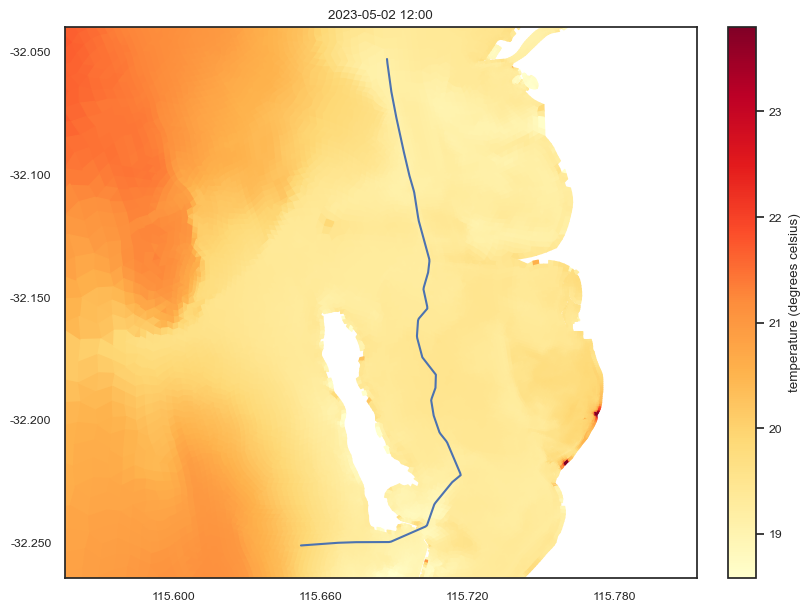

In [16]:
time = "2023-05-02 12:00"
fig, ax = plt.subplots(figsize=(8, 6), constrained_layout=True)
cspec = dict(cmap='YlOrRd') # for temerature

# Plot polyline and TEMP on the same axes
ax.set_aspect('equal', adjustable='datalim')
ax.plot(polyline[:, 0], polyline[:, 1])
fv.plot('TEMP', time, ax=ax, colorbar=True, **cspec)  # Spatial map

plt.show()

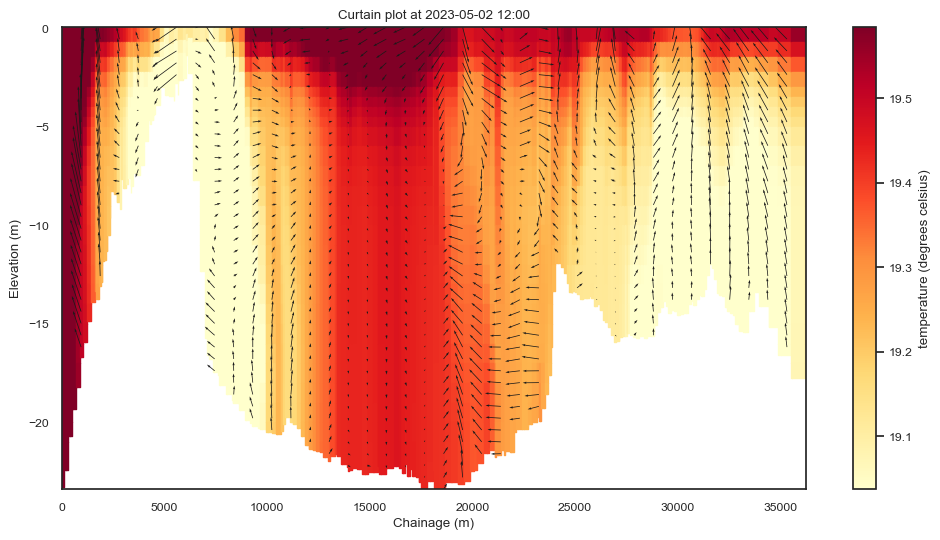

In [14]:
# Make figure + axis
fig, ax = plt.subplots(figsize=(12, 6))

# First: plot the scalar variable (TEMP curtain)
fv.plot_curtain(
    polyline,
    "TEMP",
    time=time,
    ax=ax, ec="face",  # edgecolor
    cmap="YlOrRd", # for temerature
    # clim=(19.1, 19.7),   # optional limits
)

# Second: overlay velocity vectors
fv.plot_curtain_vector(
    polyline,
    time=time,
    tangential=False,   # ensures W is shown without projection scaling
    ax=ax,
    scale=3,            # adjust arrow scaling
    # adjust spacing of arrows
    color="k",          # vector color (black arrows)
    width=0.001,        # arrow thickness
)

plt.title(f"Curtain plot at {time}")
plt.show()